In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassificationReport
from yellowbrick.model_selection import FeatureImportances
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from yellowbrick.datasets import load_credit
from yellowbrick.classifier import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from yellowbrick.datasets import load_spam
from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.model_selection import train_test_split as tts

In [2]:
df_dec = pd.read_csv(r'~/Desktop/covid/COVID_Cases_Restricted_Detailed_12042020.csv')
df_dec.head()

,race_ethnicity_combined,current_status,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
0,Unknown,Laboratory-confirmed case,2020-09-15,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
1,Unknown,Laboratory-confirmed case,2020-09-27,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
2,Unknown,Laboratory-confirmed case,2020-09-13,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
3,Unknown,Laboratory-confirmed case,2020-07-31,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
4,Unknown,Laboratory-confirmed case,2020-10-01,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years


In [3]:
death_df = df_dec.loc[(df_dec['death_yn'] == 'Yes') | (df_dec['death_yn'] == 'No')]
death_df.head()

,race_ethnicity_combined,current_status,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
7,NaN,Laboratory-confirmed case,2020-08-17,NaN,2020-07-25,2020-07-27,Yes,Yes,No,NaN,...,Missing,Yes,Yes,Missing,Yes,Yes,72005.0,AGUADILLA,PR,50 - 59 Years
49,Unknown,Laboratory-confirmed case,2020-11-10,Female,NaN,2020-11-01,Missing,Missing,Yes,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,39007.0,ASHTABULA,OH,80+ Years
55,Unknown,Laboratory-confirmed case,2020-05-11,Female,NaN,NaN,No,No,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Yes,39007.0,ASHTABULA,OH,80+ Years
56,Unknown,Laboratory-confirmed case,2020-05-11,Female,NaN,NaN,No,No,No,Missing,...,Missing,Yes,Missing,Missing,Missing,Yes,39007.0,ASHTABULA,OH,80+ Years
58,Unknown,Laboratory-confirmed case,2020-05-11,Female,NaN,NaN,No,No,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Yes,39007.0,ASHTABULA,OH,80+ Years


In [4]:
#one hot encoding
death_dummy = pd.get_dummies(death_df[['death_yn','race_ethnicity_combined','age_group','sex','hosp_yn','icu_yn','hc_work_yn','pna_yn','abxchest_yn','acuterespdistress_yn','mechvent_yn','fever_yn','sfever_yn','chills_yn','myalgia_yn','runnose_yn','sthroat_yn','cough_yn','sob_yn','nauseavomit_yn','headache_yn','abdom_yn','diarrhea_yn','medcond_yn']],dummy_na=True)

with pd.option_context('display.max_rows', 20, 'display.max_columns', None): 
    print(death_dummy.head())

    death_yn_No  death_yn_Yes  death_yn_nan  \
7             1             0             0   
49            0             1             0   
55            1             0             0   
56            1             0             0   
58            1             0             0   

    race_ethnicity_combined_American Indian/Alaska Native, Non-Hispanic  \
7                                                   0                     
49                                                  0                     
55                                                  0                     
56                                                  0                     
58                                                  0                     

    race_ethnicity_combined_Asian, Non-Hispanic  \
7                                             0   
49                                            0   
55                                            0   
56                                            0   
58         

In [5]:
death_dummy_race_missing =death_dummy['race_ethnicity_combined_Missing']+ death_dummy['race_ethnicity_combined_Unknown']+death_dummy['race_ethnicity_combined_nan']
death_dummy['death_race_missing_combined'] = death_dummy_race_missing 
death_dummy_age_missing =death_dummy['age_group_Unknown']+ death_dummy['age_group_nan']
death_dummy['death_age_missing_combined'] = death_dummy_age_missing 
death_dummy_sex_missing =death_dummy['sex_Missing']+ death_dummy['sex_Unknown']+death_dummy['sex_nan']
death_dummy['death_sex_missing_combined'] = death_dummy_sex_missing 
death_dummy_hosp_missing =death_dummy['hosp_yn_Missing']+ death_dummy['hosp_yn_Unknown']+death_dummy['hosp_yn_nan']
death_dummy['death_hosp_missing_combined'] = death_dummy_hosp_missing 
death_dummy_icu_missing =death_dummy['icu_yn_Missing']+ death_dummy['icu_yn_Unknown']+death_dummy['icu_yn_nan']
death_dummy['death_icu_missing_combined'] = death_dummy_icu_missing 
death_dummy_hc_missing =death_dummy['hc_work_yn_Missing']+ death_dummy['hc_work_yn_Unknown']+death_dummy['hc_work_yn_nan']
death_dummy['death_hc_missing_combined'] = death_dummy_hc_missing 
death_dummy_pna_missing =death_dummy['pna_yn_Missing']+ death_dummy['pna_yn_Unknown']+death_dummy['pna_yn_nan']
death_dummy['death_pna_missing_combined'] = death_dummy_pna_missing
death_dummy_abxchest_missing =death_dummy['abxchest_yn_Missing']+ death_dummy['abxchest_yn_Unknown']+death_dummy['abxchest_yn_nan']
death_dummy['death_abxchest_missing_combined'] = death_dummy_abxchest_missing
death_dummy_acuterespdistress_missing =death_dummy['acuterespdistress_yn_Missing']+ death_dummy['acuterespdistress_yn_Unknown']+death_dummy['acuterespdistress_yn_nan']
death_dummy['death_acuterespdistress_missing_combined'] = death_dummy_acuterespdistress_missing
death_dummy_mechvent_missing =death_dummy['mechvent_yn_Missing']+ death_dummy['mechvent_yn_Unknown']+death_dummy['mechvent_yn_nan']
death_dummy['death_mechvent_missing_combined'] = death_dummy_mechvent_missing
death_dummy_fever_missing =death_dummy['fever_yn_Missing']+ death_dummy['fever_yn_Unknown']+death_dummy['fever_yn_nan']
death_dummy['death_fever_missing_combined'] = death_dummy_fever_missing
death_dummy_sfever_missing =death_dummy['sfever_yn_Missing']+ death_dummy['sfever_yn_Unknown']+death_dummy['sfever_yn_nan']
death_dummy['death_sfever_missing_combined'] = death_dummy_sfever_missing
death_dummy_chills_missing =death_dummy['chills_yn_Missing']+ death_dummy['chills_yn_Unknown']+death_dummy['chills_yn_nan']
death_dummy['death_chills_missing_combined'] = death_dummy_chills_missing
death_dummy_myalgia_missing =death_dummy['myalgia_yn_Missing']+ death_dummy['myalgia_yn_Unknown']+death_dummy['myalgia_yn_nan']
death_dummy['death_myalgia_missing_combined'] = death_dummy_myalgia_missing
death_dummy_runnose_missing =death_dummy['runnose_yn_Missing']+ death_dummy['runnose_yn_Unknown']+death_dummy['runnose_yn_nan']
death_dummy['death_runnose_missing_combined'] = death_dummy_runnose_missing
death_dummy_sthroat_missing =death_dummy['pna_yn_Missing']+ death_dummy['sthroat_yn_Unknown']+death_dummy['sthroat_yn_nan']
death_dummy['death_sthroat_missing_combined'] = death_dummy_sthroat_missing
death_dummy_cough_missing =death_dummy['cough_yn_Missing']+ death_dummy['cough_yn_Unknown']+death_dummy['cough_yn_nan']
death_dummy['death_cough_missing_combined'] = death_dummy_cough_missing
death_dummy_sob_missing =death_dummy['sob_yn_Missing']+ death_dummy['sob_yn_Unknown']+death_dummy['sob_yn_nan']
death_dummy['death_sob_missing_combined'] = death_dummy_sob_missing
death_dummy_nauseavomit_missing =death_dummy['nauseavomit_yn_Missing']+ death_dummy['nauseavomit_yn_Unknown']+death_dummy['nauseavomit_yn_nan']
death_dummy['death_nauseavomit_missing_combined'] = death_dummy_nauseavomit_missing
death_dummy_headache_missing =death_dummy['headache_yn_Missing']+ death_dummy['headache_yn_Unknown']+death_dummy['headache_yn_nan']
death_dummy['death_headache_missing_combined'] = death_dummy_headache_missing
death_dummy_abdom_missing =death_dummy['abdom_yn_Missing']+ death_dummy['abdom_yn_Unknown']+death_dummy['abdom_yn_nan']
death_dummy['death_abdom_missing_combined'] = death_dummy_abdom_missing
death_dummy_diarrhea_missing =death_dummy['diarrhea_yn_Missing']+ death_dummy['diarrhea_yn_Unknown']+death_dummy['diarrhea_yn_nan']
death_dummy['death_diarrhea_missing_combined'] = death_dummy_diarrhea_missing
death_dummy_medcond_missing =death_dummy['medcond_yn_Missing']+ death_dummy['medcond_yn_Unknown']+death_dummy['medcond_yn_nan']
death_dummy['death_medcond_missing_combined'] = death_dummy_medcond_missing
death_dummy.head()

,death_yn_No,death_yn_Yes,death_yn_nan,"race_ethnicity_combined_American Indian/Alaska Native, Non-Hispanic","race_ethnicity_combined_Asian, Non-Hispanic","race_ethnicity_combined_Black, Non-Hispanic",race_ethnicity_combined_Hispanic/Latino,race_ethnicity_combined_Missing,"race_ethnicity_combined_Multiple/Other, Non-Hispanic","race_ethnicity_combined_Native Hawaiian/Other Pacific Islander, Non-Hispanic",...,death_myalgia_missing_combined,death_runnose_missing_combined,death_sthroat_missing_combined,death_cough_missing_combined,death_sob_missing_combined,death_nauseavomit_missing_combined,death_headache_missing_combined,death_abdom_missing_combined,death_diarrhea_missing_combined,death_medcond_missing_combined
7,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
49,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
55,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
56,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,0,1,1,1,0
58,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [6]:
death_dummy.drop(['race_ethnicity_combined_Missing','race_ethnicity_combined_Unknown','race_ethnicity_combined_nan','age_group_Unknown','age_group_nan','sex_Missing','sex_Unknown','sex_nan',
                  'hosp_yn_Missing','hosp_yn_Unknown','hosp_yn_nan','icu_yn_Missing','icu_yn_Unknown','icu_yn_nan','hc_work_yn_Missing','hc_work_yn_Unknown','hc_work_yn_nan',
                  'pna_yn_Missing','pna_yn_Unknown','pna_yn_nan','abxchest_yn_Missing','abxchest_yn_Unknown','abxchest_yn_nan','acuterespdistress_yn_Missing','acuterespdistress_yn_Unknown','acuterespdistress_yn_nan',
                  'mechvent_yn_Missing','mechvent_yn_Unknown','mechvent_yn_nan','fever_yn_Missing','fever_yn_Unknown','fever_yn_nan','sfever_yn_Missing','sfever_yn_Unknown','sfever_yn_nan',
                  'chills_yn_Missing','chills_yn_Unknown','chills_yn_nan','myalgia_yn_Missing','myalgia_yn_Unknown','myalgia_yn_nan','runnose_yn_Missing','runnose_yn_Unknown','runnose_yn_nan',
                  'sthroat_yn_Missing','sthroat_yn_Unknown','sthroat_yn_nan','cough_yn_Missing','cough_yn_Unknown','cough_yn_nan','sob_yn_Missing','sob_yn_Unknown','sob_yn_nan',
                  'nauseavomit_yn_Missing','nauseavomit_yn_Unknown','nauseavomit_yn_nan','headache_yn_Missing','headache_yn_Unknown','headache_yn_nan',
                  'abdom_yn_Missing','abdom_yn_Unknown','abdom_yn_nan','diarrhea_yn_Missing','diarrhea_yn_Unknown','diarrhea_yn_nan','medcond_yn_Missing','medcond_yn_Unknown','medcond_yn_nan'],axis ='columns',inplace = True)

with pd.option_context('display.max_rows', 20, 'display.max_columns', None): 
    print(death_dummy)

         death_yn_No  death_yn_Yes  death_yn_nan  \
7                  1             0             0   
49                 0             1             0   
55                 1             0             0   
56                 1             0             0   
58                 1             0             0   
...              ...           ...           ...   
8405074            1             0             0   
8405075            1             0             0   
8405076            1             0             0   
8405077            1             0             0   
8405078            1             0             0   

         race_ethnicity_combined_American Indian/Alaska Native, Non-Hispanic  \
7                                                        0                     
49                                                       0                     
55                                                       0                     
56                                                     

In [7]:
deaths_array = death_dummy['death_yn_Yes']
other_data = death_dummy.iloc[:,3:]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(other_data, deaths_array, test_size = 0.2)

In [9]:
scaler = StandardScaler()
scale = scaler.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [10]:
model = tree.DecisionTreeClassifier()

In [11]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
pred = model.predict(X_test)
score = accuracy_score(y_test,pred)
score

0.9612364785166181

/Users/yogiandyobi/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


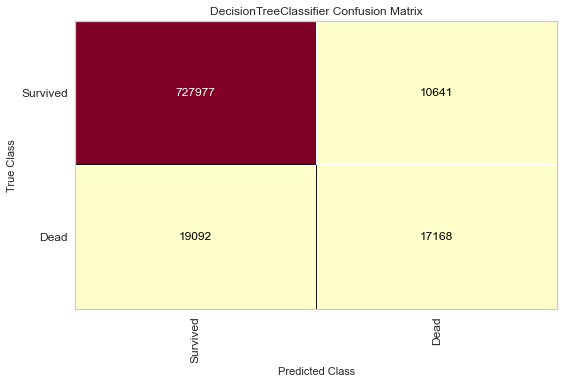

<Figure size 576x396 with 0 Axes>

In [13]:
#Load the classification dataset
X = other_data
y = deaths_array

#Create the train and test data
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

# Instantiate the visualizer with the classification model
confusion_matrix(
    tree.DecisionTreeClassifier(),
    X_train, y_train, X_test, y_test,
    classes=['Survived', 'Dead']
)
plt.tight_layout()

/Users/yogiandyobi/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


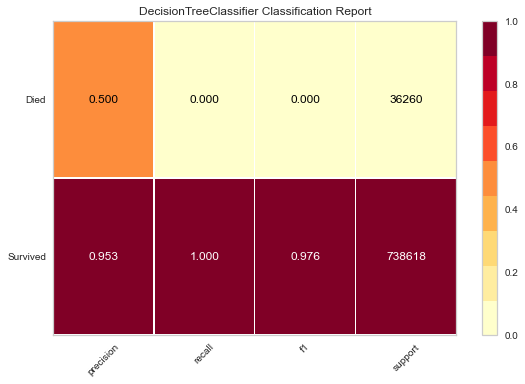

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [14]:
target = ['Survived','Died']
visualizer = ClassificationReport(model, classes=target, support=True)
visualizer.fit(X_train, y_train)      
visualizer.score(X_test, y_test)  
visualizer.show()

In [15]:
model = GaussianNB()

In [16]:
model.fit(X_train,y_train)

GaussianNB()

In [17]:
pred = model.predict(X_test)
score = accuracy_score(y_test,pred)
score

0.7370824826617868

/Users/yogiandyobi/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


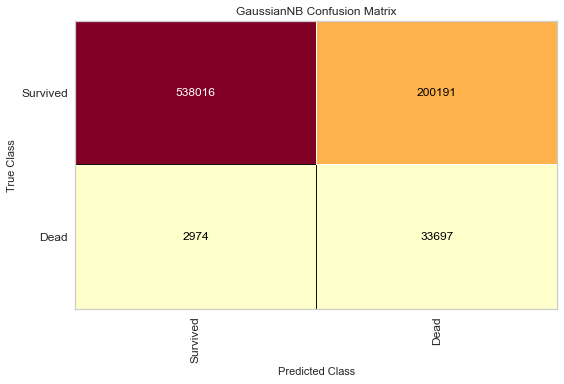

<Figure size 576x396 with 0 Axes>

In [18]:
#Load the classification dataset
X = other_data
y = deaths_array

#Create the train and test data
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

# Instantiate the visualizer with the classification model
confusion_matrix(
    GaussianNB(),
    X_train, y_train, X_test, y_test,
    classes=['Survived', 'Dead']
)
plt.tight_layout()

/Users/yogiandyobi/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


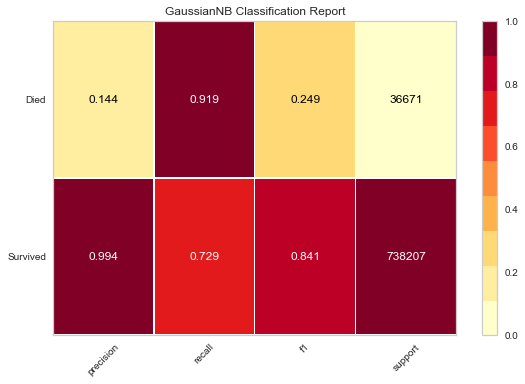

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [19]:
target = ['Survived','Died']
visualizer = ClassificationReport(model, classes=target, support=True)
visualizer.fit(X_train, y_train)      
visualizer.score(X_test, y_test)  
visualizer.show()

In [20]:
model = LogisticRegression()

In [21]:
model.fit(X_train,y_train)

/Users/yogiandyobi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
pred = model.predict(X_test)
score = accuracy_score(y_test,pred)
score

0.9612313164136806

/Users/yogiandyobi/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/Users/yogiandyobi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


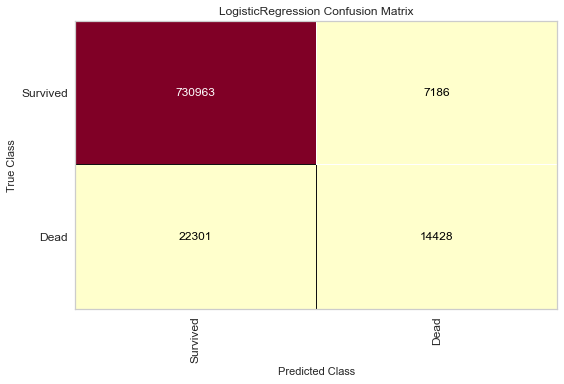

<Figure size 576x396 with 0 Axes>

In [23]:
#Load the classification dataset
X = other_data
y = deaths_array

#Create the train and test data
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

# Instantiate the visualizer with the classification model
confusion_matrix(
    LogisticRegression(),
    X_train, y_train, X_test, y_test,
    classes=['Survived', 'Dead']
)
plt.tight_layout()

/Users/yogiandyobi/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


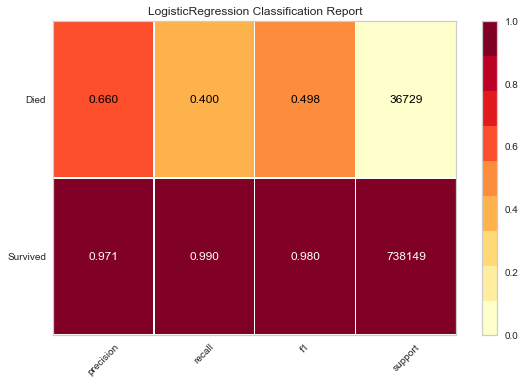

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [24]:
target = ['Survived','Died']
visualizer = ClassificationReport(model, classes=target, support=True)
visualizer.fit(X_train, y_train)      
visualizer.score(X_test, y_test)  
visualizer.show()

#training model SVC takes forever

from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

model = SVC(kernel='linear')
model.fit(X_train,y_train)
model.score(X_test,y_test)

target = ['Survived','Died']
visualizer = ClassificationReport(model, classes=target, support=True)
visualizer.fit(X_train, y_train)      
visualizer.score(X_test, y_test)  
visualizer.show()

In [25]:
#Roc-Auc Curve
X = other_data
y = deaths_array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
clf_tree = DecisionTreeClassifier()
clf_reg = LogisticRegression()
clf_naive = GaussianNB()

In [27]:
clf_tree.fit(X_train, y_train)
clf_reg.fit(X_train, y_train)
clf_naive.fit(X_train, y_train)

/Users/yogiandyobi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

In [28]:
y_score1 = clf_tree.predict_proba(X_test)[:,1]
y_score2 = clf_reg.predict_proba(X_test)[:,1]
y_score3 = clf_naive.predict_proba(X_test)[:,1]

In [29]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))
print('roc_auc_score for Naive Bayes: ', roc_auc_score(y_test, y_score3))

roc_auc_score for DecisionTree:  0.8905998176637954
roc_auc_score for Logistic Regression:  0.9614011704203066
roc_auc_score for Naive Bayes:  0.9305085343772406


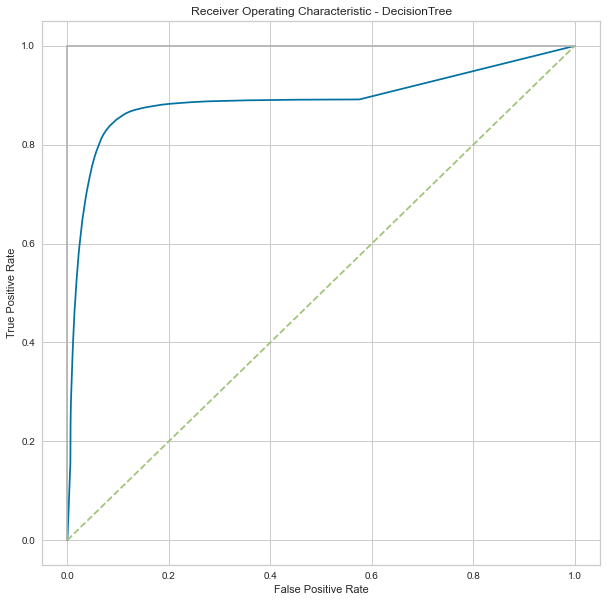

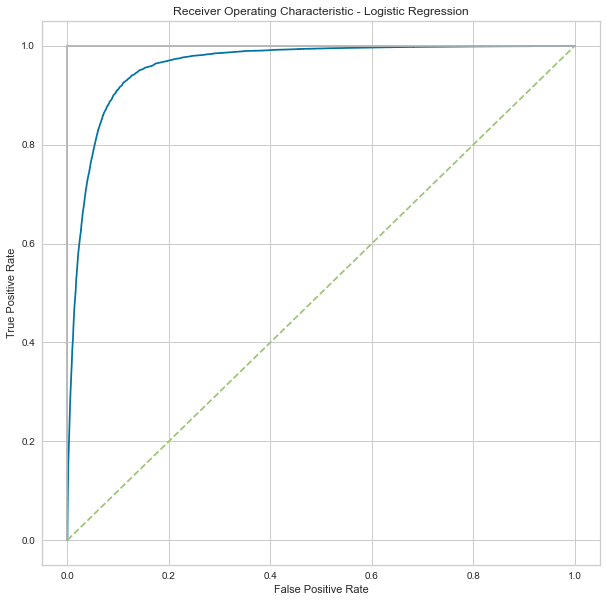

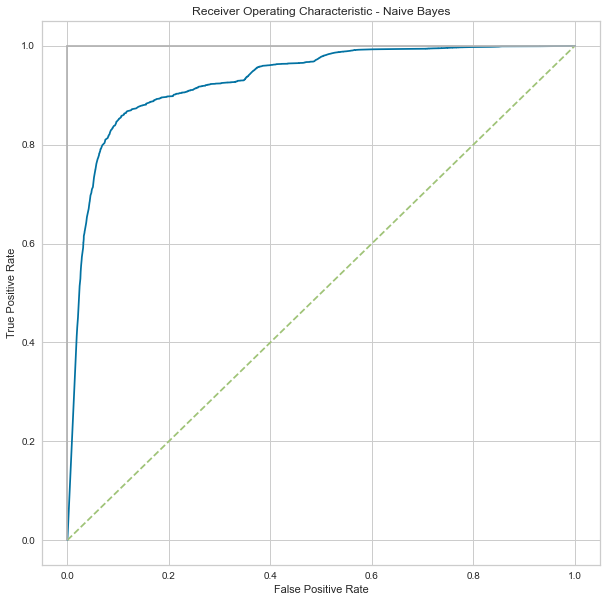

In [30]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/Users/yogiandyobi/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


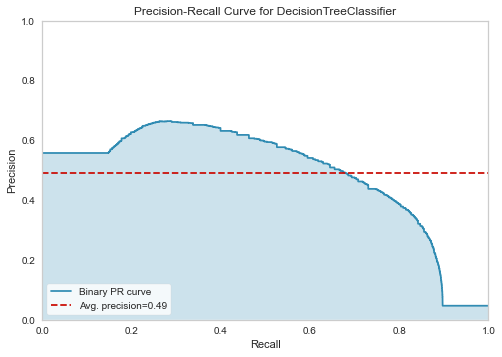

/Users/yogiandyobi/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/Users/yogiandyobi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


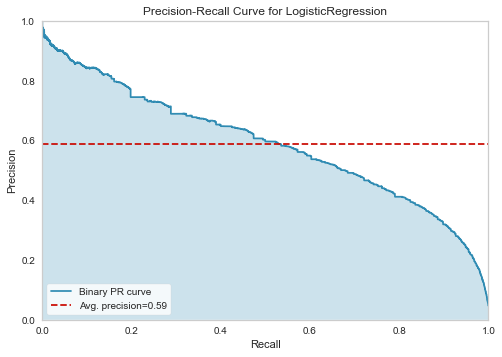

/Users/yogiandyobi/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


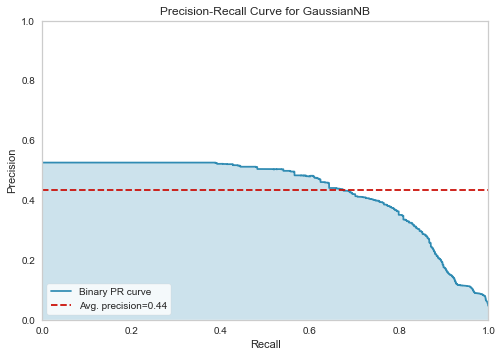

<AxesSubplot:title={'center':'Precision-Recall Curve for GaussianNB'}, xlabel='Recall', ylabel='Precision'>

In [31]:
#PR Curve
# Load the dataset and split into train/test splits
X = other_data
y = deaths_array

X_train, X_test, y_train, y_test = tts(
    X, y, test_size=0.2, shuffle=True, random_state=0
)

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(DecisionTreeClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

viz = PrecisionRecallCurve(LogisticRegression())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

viz = PrecisionRecallCurve(GaussianNB())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

In [32]:
#random search for decision tree
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X,y)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 5}
Best score is 0.9626826416545573


# grid search for logistic regression 
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X = other_data
y = deaths_array
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Load libraries
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.model_selection import RandomizedSearchCV
# Load data
iris = datasets.load_iris()
X = other_data
y = deaths_array
# Create logistic regression
logistic = linear_model.LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(logistic, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)
# Fit randomized search
best_model = clf.fit(X, y)
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
